<a href="https://colab.research.google.com/github/mardom/astrostatistics-2020/blob/main/Regresion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://bookdown.org/max/FES/

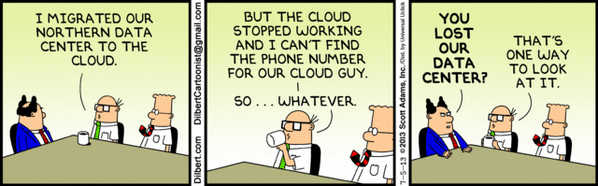

https://infrastructure.aws/



#  Formulation of the Regression Problem

Regression addresses a slightly simpler problem: instead of determining the multidimensional pdf, we wish to infer the expectation value of $y$ given $x$ (i.e., the conditional expectation value). If we have a model for the conditional distribution (described by parameters $\theta$ ) we can write this function as $y = f (x|θ)$. 
We refer to $y$ as a scalar dependent variable and $x$ as an independent vector. Here $x$ does not need to be a random variable (e.g., $x$ could correspond to deterministic sampling times for a time series). For a given model class (i.e., the function $f$ can be an analytic function
such as a polynomial, or a nonparametric estimator), we have $k$ model parameters
$\theta_p, p = 1, . . . , k$.


Nest figure illustrates how the constraints on the model parameters, $\theta$ , respond
to the observations $x_i$ and $y_i$. In this example, we assume a simple straight-line
model with $y_i = \theta_0 + \theta_1 x_i$ . Each point provides a joint constraint on $\theta_0$ and $\theta_1$. If there were no uncertainties on the variables then this constraint would be a straight
line in the ($\theta_0 , \theta_1$) plane 
($\theta_0 = y_i − \theta_1 x_i$). As the 
number of points is increased the best estimate of the model parameters would then be the intersection of all lines. Uncertainties within the data will transform the constraint from a line to a distribution (represented by the region shown as a gray band in figure). The best
estimate of the model parameters is now given by the posterior distribution. This is simply the multiplication of the probability distributions (constraints) for all points and is shown by the error ellipses in the lower panel of figure.
 Measurements with upper limits (e.g., point $x_4$) manifest as half planes within the parameter space. Priors
are also accommodated naturally within this picture as additional multiplicative
constraints applied to the likelihood distribution. 




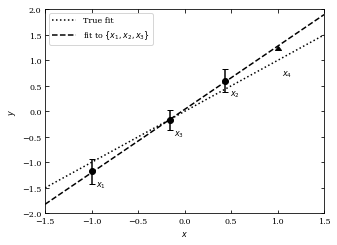

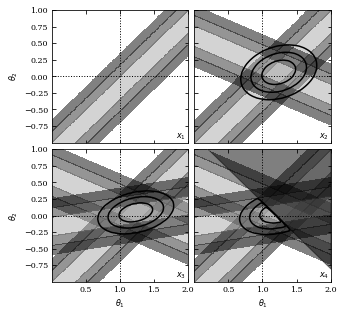

In [2]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.plotting.mcmc import convert_to_stdev

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Set up the data and errors
np.random.seed(13)
a = 1
b = 0

x = np.array([-1, 0.44, -0.16])
y = a * x + b
dy = np.array([0.25, 0.22, 0.2])

y = np.random.normal(y, dy)

# add a fourth point which is a lower bound
x4 = 1.0
y4 = a * x4 + b + 0.2

#------------------------------------------------------------
# Compute the likelihoods for each point
a_range = np.linspace(0, 2, 80)
b_range = np.linspace(-1, 1, 80)
logL = -((a_range[:, None, None] * x + b_range[None, :, None] - y) / dy) ** 2
sigma = [convert_to_stdev(logL[:, :, i]) for i in range(3)]

# compute best-fit from first three points
logL_together = logL.sum(-1)
i, j = np.where(logL_together == np.max(logL_together))
amax = a_range[i[0]]
bmax = b_range[j[0]]

#------------------------------------------------------------
# Plot the first figure: the points and errorbars
fig1 = plt.figure(figsize=(5, 3.75))
ax1 = fig1.add_subplot(111)

# Draw the true and best-fit lines
xfit = np.array([-1.5, 1.5])
ax1.plot(xfit, a * xfit + b, ':k', label='True fit')
ax1.plot(xfit, amax * xfit + bmax, '--k', label='fit to $\{x_1, x_2, x_3\}$')

ax1.legend(loc=2)

ax1.errorbar(x, y, dy, fmt='ok')
ax1.errorbar([x4], [y4], [[0.5], [0]], fmt='_k', lolims=True)

for i in range(3):
    ax1.text(x[i] + 0.05, y[i] - 0.3, "$x_{%i}$" % (i + 1))
ax1.text(x4 + 0.05, y4 - 0.5, "$x_4$")

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-2, 2)

#------------------------------------------------------------
# Plot the second figure: likelihoods for each point
fig2 = plt.figure(figsize=(5, 5))
fig2.subplots_adjust(hspace=0.05, wspace=0.05)

# plot likelihood contours
for i in range(4):
    ax = fig2.add_subplot(221 + i)
    for j in range(min(i + 1, 3)):
        ax.contourf(a_range, b_range, sigma[j].T,
                    levels=(0, 0.683, 0.955, 0.997),
                    cmap=plt.cm.binary, alpha=0.5)

# plot the excluded area from the fourth point
axpb = a_range[:, None] * x4 + b_range[None, :]
mask = y4 < axpb
fig2.axes[3].fill_between(a_range, y4 - x4 * a_range, 2, color='k', alpha=0.5)

# plot ellipses
for i in range(1, 4):
    ax = fig2.axes[i]
    logL_together = logL[:, :, :i + 1].sum(-1)
    if i == 3:
        logL_together[mask] = -np.inf

    sigma_together = convert_to_stdev(logL_together)

    ax.contour(a_range, b_range, sigma_together.T,
               levels=(0.683, 0.955, 0.997),
               colors='k')

# Label and adjust axes
for i in range(4):
    ax = fig2.axes[i]

    ax.text(1.98, -0.98, "$x_{%i}$" % (i + 1), ha='right', va='bottom')

    ax.plot([0, 2], [0, 0], ':k', lw=1)
    ax.plot([1, 1], [-1, 1], ':k', lw=1)

    ax.set_xlim(0.001, 2)
    ax.set_ylim(-0.999, 1)

    if i in (1, 3):
        ax.yaxis.set_major_formatter(plt.NullFormatter())
    if i in (0, 1):
        ax.xaxis.set_major_formatter(plt.NullFormatter())
    if i in (0, 2):
        ax.set_ylabel(r'$\theta_2$')
    if i in (2, 3):
        ax.set_xlabel(r'$\theta_1$')


plt.show()

Computationally, the cost of this general approach to regression can be prohibitive (particularly for large data sets). In order to make the analysis tractable, we
will, therefore, define several types of regression using three “classification axes”:

- Linearity. When a parametric model is linear in all model parameters, that is, $f (x| \theta ) = \sum_{p=1}^{k} \theta_p g_p (x)$, where functions $g_p (x)$ do not depend on any free
model parameters (but can be nonlinear functions of $x$), regression becomes a significantly simpler problem, called linear regression. Examples of this include polynomial regression, and radial basis function regression. Regression of models that include nonlinear dependence on $\theta_p$ , such as $f (x|\theta ) =\theta_1 +
\theta_2 sin(\theta_3 x)$, is called nonlinear regression.

- Problem complexity. A large number of independent variables increases the
complexity of the error covariance matrix, and can become a limiting factor in nonlinear regression. The most common regression case found in practice is the M = 1 case with only a single independent variable (i.e., fitting a straight line to data). For linear models and negligible errors on the independent
variables, the problem of dimensionality is not (too) important.

- Error behavior. The uncertainties in the values of independent and dependent
variables, and their correlations, are the primary factor that determines which
regression method to use. The structure of the error covariance matrix, and deviations from Gaussian error behavior, can turn seemingly simple problems into complex computational undertakings. Here we will separately discuss the
following cases:

1. Both independent and dependent variables have negligible errors (compared to the intrinsic spread of data values); this is the simplest and
most common “y vs. x” case, and can be relatively easily solved even
for nonlinear models and multidimensional data.
2. Only errors for the dependent variable (y) are important, and their
distribution is Gaussian and homoscedastic (with σ either known or
unknown).
3. Errors for the dependent variable are Gaussian and known, but het-
eroscedastic.
4. Errors for the dependent variable are non-Gaussian, and their behavior
is known.
5. Errors for the dependent variable are non-Gaussian, but their exact
behavior is unknown.
6. Errors for independent variables (x) are not negligible, but the full
covariance matrix can be treated as Gaussian. This case is relatively
straightforward when fitting a straight line, but can become cumber-
some for more complex models.
7. All variables have non-Gaussian errors. This is the hardest case and
there is no ready-to-use general solution. In practice, the problem is
solved on a case-by-case basis, typically using various approximations
that depend on the problem specifics.

For the first four cases, when error behavior for the dependent variable is known,
and errors for independent variables are negligible, we can easily use the Bayesian
methodology previusly developed to write the posterior pdf for the model parameters,

$$p(\theta| \{ x_i, y_i \}, I)= \propto p(\{ x_i, y_i \} | \theta, I) p(\theta, I) $$

Here the information $I$ describes the error behavior for the dependent variable. The
data likelihood is the product of likelihoods for the individual points, and the latter
can be expressed as:

$$p(y_i | x_i, \theta, I )= e(y_i | y)$$

where $y = f (x|\theta)$ is the adopted model class, and $e(y_i |y)$ is the probability of
observing $y_i$ given the true value (or the model prediction) $y$. For example, if the
y error distribution is Gaussian, with the width for i th data point given by $\sigma_i$ , and
the errors on $x$ are negligible, then

$$p(y_i|x_i, \theta, I)=\frac{1}{\sigma_i \sqrt{2\pi}} exp(\frac{-|y_i-f((x_i|\theta)|^2}{2\sigma_i^2})$$

### Data Sets Used in This Chapter
For regression and its application to astrophysics we focus on the relation between
the redshifts of supernovas and their luminosity distance (i.e., a cosmological parametrization of the expansion of the universe). To accomplish this we generate a set of synthetic supernova data assuming a cosmological model given by

$$\mu(z)=-5 log_{10}(\frac{(1+z)c}{H_O} \int \frac{dz}{(\Omega_m(1+z^3)+\Omega_{\Lambda})^{1/2}}  )$$

where $\mu(z)$ is the distance modulus to the supernova, $H_0$ is the Hubble constant, $\Omega_m$ is the cosmological matter density and $\Omega_{\Lambda}$ is the energy density from a cosmological constant. For our fiducial cosmology we choose $\Omega_m = 0.3, \Omega_{\Lambda}= 0.7$ and $H_0 = 70 km s −1 Mpc −1$ , and add heteroscedastic Gaussian noise that increases linearly with redshift. The resulting $\mu(z)$ cannot be expressed as a sum of simple closedform analytic functions, including low-order polynomials. This example addresses
many of the challenges we face when working with observational data sets: we do not know the intrinsic complexity of the model (e.g., the form of dark energy), the dependent variables can have heteroscedastic uncertainties, there can be missing or incomplete data, and the dependent variables can be correlated. For the majority of techniques described in this chapter we will assume that uncertainties in the
independent variables are small (relative to the range of data and relative to the dependent variables). In real-world applications we do not get to make this choice (the observations themselves define the distribution in uncertainties irrespective of the models we assume). For the supernova data, an example of such a case would be if we estimated the supernova redshifts using broadband photometry (i.e., photometric redshifts).  We also
note that this toy model data set is a simplification in that it does not account for the effect of K -corrections on the observed colors and magnitudes; see https://arxiv.org/abs/astro-ph/0210394.



# Regression for Linear Models
Given an independent variable x and a dependent variable y, we will start by
considering the simplest case, a linear model with:

$$y_i=\theta_0+\theta_1 x+ \epsilon_i$$

Here $\theta_0$ and $\theta_1$ are the coefficients that describe the regression (or objective) function that we are trying to estimate (i.e., the slope and intercept for a straight line $f (x) = \theta_0 + \theta_1 x_i$), and $\epsilon_i$ represents an additive noise term.

The assumptions that underlie our linear regression model include the uncer-
tainties on the independent variables that are considered to be negligible, and the
dependent variables have known heteroscedastic uncertainties, $\epsilon_i = N (0, \sigma_i )$. We can write the data likelihood as:

$$p(\{y_i\}|\theta, \{x_i\}, \theta, I)= \prod_{i=1}^{N} \frac{1}{\sigma_i \sqrt{2\pi}} exp(\frac{-|y_i-(\theta_0 + \theta_1 x_i)|^2}{2\sigma_i^2})$$

For a flat or uninformative prior pdf, $p(\theta |I )$, where we have no knowledge about
the distribution of the parameters $\theta$ , the posterior will be directly proportional to
the likelihood function (which is also known as the error function). If we take the
logarithm of the posterior then we arrive at the classic definition of regression in
terms of the log-likelihood:

$$ln(L)=ln(\theta| \{ x_i, y_i\}, I)\propto \sum_{i=1}^{N} (\frac{-|y_i-(\theta_0 + \theta_1 x_i)|^2}{2\sigma_i^2})$$

Maximizing the log-likelihood as a function of the model parameters, $\theta$, is
achieved by minimizing the sum of the square errors. This observation dates back
to the earliest applications of regression with the work of Gauss and Legendre, when the technique was introduced as the “method of least squares.”

The form of the likelihood function and the “method of least squares” optimization arises from our assumption of Gaussianity for the distribution of uncertainties in the dependent variables. Other forms for the likelihoods can be assumed (e.g., using the L1 norm,, which actually precedes the use of the L2 norm,
but this is usually at the cost of increased computational complexity). If it is known
that measurement errors follow an exponential distribution instead of a Gaussian distribution, then the L1 norm should be used instead of the L2 norm and the last equation should be replaced by

$$ln(L)=\propto \sum_{i=1}^{N} (\frac{-|y_i-(\theta_0 + \theta_1 x_i)|}{\sigma_i})$$

or the case of Gaussian homoscedastic uncertainties, the minimization simplifies to

$$\theta_1=\frac{\sum_{i=1}^{N}x_iy_i-\bar{x}\bar{y}}{\sum_{i=1}^{N}(x_i-\bar{x})^2}$$

$$\theta_0=\bar{y}-\theta_1\bar{x}$$

where $\bar{x}$ is the mean value of $x$ and $\bar{y}$ is the mean value of $y$. As an illustration, these estimates of $\theta_0$ and $\theta_1$ correspond to the center of the ellipse shown in the bottom-left
panel in figure 1. An estimate of the variance associated with this regression and the
standard errors on the estimated parameters are given by:

$$\sigma^2=\sum_{i=1}^{N} (y_i-\theta_0-\theta_1x_i)^2$$
$$\sigma_{\theta_1}^2=\sigma^2\frac{1}{\sum_{i=1}^{N}(x_i-\bar{x})^2}$$
$$\sigma_{\theta_2}^2=\sigma^2(\frac{1}{N}+\frac{\bar{x}^2}{\sum_{i=1}^{N}(x_i-\bar{x})^2})$$

For heteroscedastic errors, and in general for more complex regression functions, it is easier and more compact to generalize regression in terms of matrix notation. We, therefore, define regression in terms of a design matrix, $M$, such that

$$Y=M\theta$$

where $Y$ is an N-dimensional vector of values $y_i$

$$Y=\begin{pmatrix} y_0 \\ y_1 \\ y_2 \\ .. \\ y_{N-1} \end{pmatrix}$$

For our straight-line regression function, $\theta$ is a two-dimensional vector of regression coefficients,

$$\theta=\begin{pmatrix} \theta_0 \\ \theta_1  \end{pmatrix}$$

and M is a 2 × N matrix,

$$\begin{bmatrix} 1 & x_0  \\ 1 & x_1  \\ 1 & x+2 \\.. & .. \\ 1 & x_{N-1}  \end{bmatrix}$$

where the constant value in the first column captures the $\theta_0$ term in the regression.
For the case of heteroscedastic uncertainties, we define a covariance matrix, $C$, as an N × N matrix,

$$C= \begin{bmatrix} \sigma_0 & 0 & .. & 0 \\ 0 & \sigma_1 & .. & 0 \\ .. & .. & .. & .. \\ 0 & 0 & .. & \sigma_{N-1} \end{bmatrix}$$

with the diagonals of this matrix containing the uncertainties, $\sigma_i$ , on the dependent
variable, Y. The maximum likelihood solution for this regression is

$$\theta=(M^T C^{-1} M)^{-1}(M^T C^{-1} Y)$$

which again minimizes the sum of the square errors, as we did explicitly. The uncertainties on the regression coefficients, $\theta$ , can now be expressed as the symmetric matrix

$$\Sigma_{\theta}=\begin{bmatrix} \sigma^2_{\theta_0} & \sigma_{\theta_0 \theta_1}  \\ \sigma_{\theta_0 \theta_1} & \sigma^2_{\theta_1} \end{bmatrix} = [M^T C^{-1} M]^{-1}$$

Whether we have sufficient data to constrain the regression (i.e., sufficient degrees of
freedom) is defined by whether $M^T M$ is an invertible matrix.

The top-left panel of next figure illustrates a simple linear regression of redshift,
$z$, against distance modulus, $\mu$, for the set of 100 supernovas described previusly. The
solid line shows the regression function for the straight-line model and the dashed line the underlying cosmological model from which the data were drawn (which of course cannot be described by a straight line). It is immediately apparent that the chosen regression model does not capture the structure within the data at the high and low redshift limits —the model does not have sufficient flexibility to reproduce 
the correlation displayed by the data. This is reflected in the $\chi^2_{dof}$.


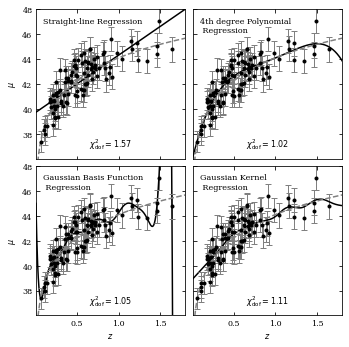

In [3]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astropy.cosmology import LambdaCDM
from astroML.datasets import generate_mu_z
from astroML.linear_model import (LinearRegression, PolynomialRegression,
                                  BasisFunctionRegression, NadarayaWatson)

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Generate data
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=0)

cosmo = LambdaCDM(H0=70, Om0=0.30, Ode0=0.70, Tcmb0=0)
z = np.linspace(0.01, 2, 1000)
mu_true = cosmo.distmod(z)

#------------------------------------------------------------
# Define our classifiers
basis_mu = np.linspace(0, 2, 15)[:, None]
basis_sigma = 3 * (basis_mu[1] - basis_mu[0])

subplots = [221, 222, 223, 224]
classifiers = [LinearRegression(),
               PolynomialRegression(4),
               BasisFunctionRegression('gaussian',
                                       mu=basis_mu, sigma=basis_sigma),
               NadarayaWatson('gaussian', h=0.1)]
text = ['Straight-line Regression',
        '4th degree Polynomial\n Regression',
        'Gaussian Basis Function\n Regression',
        'Gaussian Kernel\n Regression']

# number of constraints of the model.  Because
# Nadaraya-watson is just a weighted mean, it has only one constraint
n_constraints = [2, 5, len(basis_mu) + 1, 1]

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(left=0.1, right=0.95,
                    bottom=0.1, top=0.95,
                    hspace=0.05, wspace=0.05)

for i in range(4):
    ax = fig.add_subplot(subplots[i])

    # fit the data
    clf = classifiers[i]
    clf.fit(z_sample[:, None], mu_sample, dmu)

    mu_sample_fit = clf.predict(z_sample[:, None])
    mu_fit = clf.predict(z[:, None])

    chi2_dof = (np.sum(((mu_sample_fit - mu_sample) / dmu) ** 2)
                / (len(mu_sample) - n_constraints[i]))

    ax.plot(z, mu_fit, '-k')
    ax.plot(z, mu_true, '--', c='gray')
    ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)

    ax.text(0.5, 0.05, r"$\chi^2_{\rm dof} = %.2f$" % chi2_dof,
            ha='center', va='bottom', transform=ax.transAxes)

    ax.set_xlim(0.01, 1.8)
    ax.set_ylim(36.01, 48)
    ax.text(0.05, 0.95, text[i], ha='left', va='top',
            transform=ax.transAxes)

    if i in (0, 2):
        ax.set_ylabel(r'$\mu$')
    else:
        ax.yaxis.set_major_formatter(plt.NullFormatter())

    if i in (2, 3):
        ax.set_xlabel(r'$z$')
    else:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

plt.show()

We now relax the assumptions we made at the start of this section, allowing not
just for heteroscedastic uncertainties but also for correlations between the measures
of the dependent variables. With no loss in generality, equations can be extended
to allow for covariant data through the off-diagonal elements of the covariance
matrix C.

# Multivariate Regression
For multivariate data (where we fit a hyperplane rather than a straight line) we simply extend the description of the regression function to multiple dimensions, with $y = f (x|\theta)$ given by:

$$y_i=\theta_0+\theta_1 x_1+ \theta_2 x_2 + .. + \theta_{k}x_{k}+\epsilon_i$$

with $\theta_i$ the regression parameters and $x_{ i k }$ the k-th component of the i-th data entry within a multivariate data set. This multivariate regression follows naturally from the definition of the design matrix with

$$M=\begin{bmatrix} 1 & x_{01} & x_{02} & .. & x_{0k} \\ 1 & x_{11} & x_{12} & .. & x_{1k} \\ .. & ..& ..& ..& .. \\ 1 & x_{N1} & X_{N2} & ..& N_{Nk} \end{bmatrix}$$

The regression coefficients (which are estimates of $\theta$ and are often differentiated
from the true values by writing them as $\hat{\theta}$ and their uncertainties are, as before,

$$\theta=(M^T C^{-1} M)^{-1}(M^T C^{-1} Y)$$

$$\Sigma_{\theta}= [M^T C^{-1} M]^{-1}$$

## 8.2.2. Polynomial and Basis Function Regression

Due to its simplicity, the derivation of regression in most textbooks is undertaken
using a straight-line fit to the data. However, the straight line can simply be
interpreted as a first-order expansion of the regression function $y = f (x| \theta)$. In
general we can express $f (x|\theta)$ as the sum of arbitrary (often nonlinear) functions as
long as the model is linear in terms of the regression parameters, $\theta$. Examples of these general linear models include a Taylor expansion of $f(x)$ as a series of polynomials
where we solve for the amplitudes of the polynomials, or a linear sum of Gaussians
with fixed positions and variances where we fit for the amplitudes of the Gaussians.
Let us initially consider polynomial regression and write f $(x|θ)$ as

$$y_i=\theta_0+\theta_1 x_i + \theta_2 x_i^2 + \theta_3 x_i^3 + ... $$

The design matrix for this expansion becomes

$$M=\begin{bmatrix} 1 & x_0 & x_0^2 & x_0^3 \\ 1 & x_1 & x_1^2 & x_1^3 \\ .. & ..& ..& ..\\1 & x_N & x_N^2 & x_N^3 \end{bmatrix}$$

where the terms in the design matrix are $1, x, x
^2$ , and $x^3$ , respectively. The solution
for the regression coefficients and the associated uncertainties are as before,

A fourth-degree polynomial fit to the supernova data is shown in the top-right
panel of figure. The increase in flexibility of the model improves the fit (note that
we have to be aware of overfitting the data if we just arbitrarily increase the degree of
the polynomial.  The $\chi^2_{dof}$ of the regression is 1.02, which indicates a 
better fit than the straight-line case. At high redshift, however, there is a systematic
deviation between the polynomial regression and the underlying generative model (shown by the dashed line), which illustrates the danger of extrapolating this model beyond the range probed by the data.

The number of terms in the polynomial regression grows exponentially with order. Given a data set with k dimensions to which we fit a p-dimensional polynomial, the number of parameters in the model we are fitting is given by

$$m=\frac{(p+k)!}{p!k!}$$

including the intercept or offset. The number of degrees of freedom for the regression
model is then $\nu = N − m$ and the probability of that model is given by a $\chi^2$
distribution with $\chi$ degrees of freedom.
We can generalize the polynomial model to a basis function representation by noting that each row of the design matrix can be replaced with any series of linear or nonlinear functions of the variables $x_i$. Despite the use of arbitrary basis functions, the resulting problem remains linear, because we are fitting only the
coefficients multiplying these terms. Examples of commonly used basis functions include Gaussians, trigonometric functions, inverse quadratic functions, and splines.

The application of Gaussian basis functions to our example regression problem is shown in figure. In the lower-left panel, 15 Gaussians, evenly spaced between  redshifts $0 < z < 2$ with widths of $\sigma_z = 0.14$, are fit to the supernova data. The $\chi^2_{dof}$
for this fit is 1.09, comparable to that for polynomial regression.


# Regularization and Penalizing the Likelihood
All regression examples so far have sought to minimize the mean square errors between a model and data with known uncertainties. In some cases, however, the regression problem may be ill posed and the best unbiased estimator is not the most appropriate regression. Instead, we can trade an increase in bias for a reduction in variance. Examples of such cases include data that are highly correlated (which results in
ill-conditioned matrices), or when the number of terms in the regression model decreases the number of degrees of freedom such that we must worry about overfitting of the data.

One solution to these problems is to penalize or limit the complexity of the underlying regression model. This is often referred to as regularization, or shrinkage, and works by applying a penalty to the likelihood function. Regularization can come in many forms, but usually imposes smoothness on the model, or limits the numbers of, or the values of, the regression coefficients.

We showed that regression minimizes the least-squares equation,

$$(Y-M\theta)^T(Y-M\theta)$$

We can impose a penalty on this minimization if we include a regularization term,

$$(Y-M\theta)^T(Y-M\theta)+\lambda|\theta^T \theta|$$

where $\lambda$ is the regularization or smoothing parameter and $|\theta^T \theta |$ is an example of the penalty function. In this example, we penalize the size of the regression coefficients (which is known as ridge regression as we will discuss in the next section). Solving
for $\theta$ we arrive at a modificated eq,

$$\theta=(M^TC^{-1}M+\lambda I)^{-1}(M^T C^{-1}Y)
$$

where $I$ is the identity matrix. One aspect worth noting about robustness through
regularization is that, even if $M^T C^{−1} M$ is singular, solutions can still exist for
$(M^T C^{−1} M + \lambda I)$.

A Bayesian implementation of regularization would use the prior to impose constraints on the probability distribution of the regression coefficients. If, for example, we assumed that the prior on the regression coefficients was Gaussian with the width of this Gaussian governed by the regularization parameter $\lambda$ then we could write it as

$$p(\theta | I) \propto \exp(\frac{-(\lambda \theta^T \theta)}{2})$$

Multiplying the likelihood function by this prior results in a posterior distribution
with an exponent $(Y − M\theta)^T (Y − M\theta) + \lambda|\theta^T \theta|$, equivalent to the MLE regularized regression described above. This Gaussian prior corresponds to ridge regression.
For LASSO regression, described below, the corresponding prior would be an exponential (Laplace) distribution.

## Ridge Regression

The regularization example above is often referred to as ridge regression or Tikhonov
regularization https://mathshistory.st-andrews.ac.uk/Biographies/Tikhonov/. It provides a penalty on the sum of the squares of the regression coefficients such that:

$$|\theta|^2 < s$$

where s controls the complexity of the model in the same way as the regularization
parameter $\lambda$. By suppressing large regression coefficients this penalty
limits the variance of the system at the expense of an increase in the bias of the derived
coefficients.

A geometric interpretation of ridge regression is shown in the next figure. The solid
elliptical contours are the likelihood surface for the regression with no regularization.
The circle illustrates the constraint on the regression coefficients ($|\theta|^2 < s$) imposed by the regularization. The penalty on the likelihood function, based on the squared
norm of the regression coefficients, drives the solution to small values of $\theta$ . The
smaller the value of $s$ (or the larger the regularization parameter $\lambda$) the more the
regression coefficients are driven toward zero.




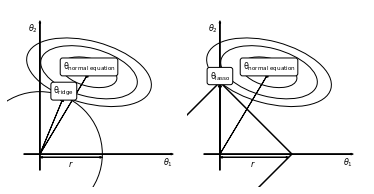

In [4]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse, Circle, RegularPolygon

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots

#------------------------------------------------------------
# Set up figure
fig = plt.figure(figsize=(5, 2.5), facecolor='w')

#------------------------------------------------------------
# plot ridge diagram
ax = fig.add_axes([0, 0, 0.5, 1], frameon=False, xticks=[], yticks=[])

# plot the axes
ax.arrow(-1, 0, 9, 0, head_width=0.1, fc='k')
ax.arrow(0, -1, 0, 9, head_width=0.1, fc='k')

# plot the ellipses and circles
for i in range(3):
    ax.add_patch(Ellipse((3, 5),
                         3.5 * np.sqrt(2 * i + 1), 1.7 * np.sqrt(2 * i + 1),
                         -15, fc='none'))

ax.add_patch(Circle((0, 0), 3.815, fc='none'))

# plot arrows
ax.arrow(0, 0, 1.46, 3.52, head_width=0.2, fc='k',
         length_includes_head=True)
ax.arrow(0, 0, 3, 5, head_width=0.2, fc='k',
         length_includes_head=True)
ax.arrow(0, -0.2, 3.81, 0, head_width=0.1, fc='k',
         length_includes_head=True)
ax.arrow(3.81, -0.2, -3.81, 0, head_width=0.1, fc='k',
         length_includes_head=True)

# annotate with text
ax.text(7.5, -0.1, r'$\theta_1$', va='top')
ax.text(-0.1, 7.5, r'$\theta_2$', ha='right')
ax.text(3, 5 + 0.2, r'$\rm \theta_{normal\ equation}$',
        ha='center', bbox=dict(boxstyle='round', ec='k', fc='w'))
ax.text(1.46, 3.52 + 0.2, r'$\rm \theta_{ridge}$', ha='center',
        bbox=dict(boxstyle='round', ec='k', fc='w'))
ax.text(1.9, -0.3, r'$r$', ha='center', va='top')

ax.set_xlim(-2, 9)
ax.set_ylim(-2, 9)

#------------------------------------------------------------
# plot lasso diagram
ax = fig.add_axes([0.5, 0, 0.5, 1], frameon=False, xticks=[], yticks=[])

# plot axes
ax.arrow(-1, 0, 9, 0, head_width=0.1, fc='k')
ax.arrow(0, -1, 0, 9, head_width=0.1, fc='k')

# plot ellipses and circles
for i in range(3):
    ax.add_patch(Ellipse((3, 5),
                         3.5 * np.sqrt(2 * i + 1), 1.7 * np.sqrt(2 * i + 1),
                         -15, fc='none'))

# this is producing some weird results on save
#ax.add_patch(RegularPolygon((0, 0), 4, 4.4, np.pi, fc='none'))
ax.plot([-4.4, 0, 4.4, 0, -4.4], [0, 4.4, 0, -4.4, 0], '-k')

# plot arrows
ax.arrow(0, 0, 0, 4.4, head_width=0.2, fc='k', length_includes_head=True)
ax.arrow(0, 0, 3, 5, head_width=0.2, fc='k', length_includes_head=True)
ax.arrow(0, -0.2, 4.2, 0, head_width=0.1, fc='k', length_includes_head=True)
ax.arrow(4.2, -0.2, -4.2, 0, head_width=0.1, fc='k', length_includes_head=True)

# annotate plot
ax.text(7.5, -0.1, r'$\theta_1$', va='top')
ax.text(-0.1, 7.5, r'$\theta_2$', ha='right')
ax.text(3, 5 + 0.2, r'$\rm \theta_{normal\ equation}$',
        ha='center', bbox=dict(boxstyle='round', ec='k', fc='w'))
ax.text(0, 4.4 + 0.2, r'$\rm \theta_{lasso}$', ha='center',
        bbox=dict(boxstyle='round', ec='k', fc='w'))
ax.text(2, -0.3, r'$r$', ha='center', va='top')

ax.set_xlim(-2, 9)
ax.set_ylim(-2, 9)

plt.show()

The regularized regression coefficients can be derived through matrix inversion as before. Applying an SVD to the $N × m$ design matrix (where m is the number of terms in the model) we get $M = U \Sigma V^T$ , with U an $N × m$ matrix, $V^T$ the $m × m$ matrix of eigenvectors and $\Sigma$ the $m × m$ matrix of eigenvalues. We can now write the regularized regression coefficients as

$$\theta=V \Sigma^{'} U^T Y$$

where $\Sigma^{'}$ is a diagonal matrix with elements $d_i /(d_i^2 + λ)$, with $d_i$ the eigenvalues of $M M^T$.

As $\lambda$ increases, the diagonal components are down weighted so that only those
components with the highest eigenvalues will contribute to the regression. This
relates directly to the PCA analysis we studied.

Next Figure uses the Gaussian basis function regression to illustrate
how ridge regression will constrain the regression coefficients. The left panel shows
the general linear regression for the supernovas (using 100 evenly spaced Gaussians
with σ = 0.2). As we noted in, an increase in the number of model parameters results in an overfitting of the data (the lower panel in figure  shows how the regression coefficients for this fit are on the order of $10^8$). The central panel demonstrates how ridge regression (with $\lambda = 0.005$) suppresses the amplitudes of the regression coefficients and the resulting fluctuations in the modeled response.

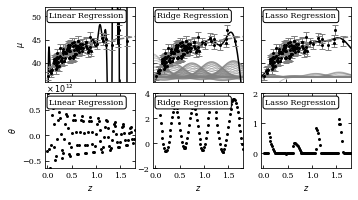

In [5]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astropy.cosmology import LambdaCDM

from astroML.linear_model import LinearRegression
from astroML.datasets import generate_mu_z

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#----------------------------------------------------------------------
# generate data
np.random.seed(0)

z_sample, mu_sample, dmu = generate_mu_z(100, random_state=0)
cosmo = LambdaCDM(H0=70, Om0=0.30, Ode0=0.70, Tcmb0=0)

z = np.linspace(0.01, 2, 1000)
mu = cosmo.distmod(z).value


#------------------------------------------------------------
# Manually convert data to a gaussian basis
#  note that we're ignoring errors here, for the sake of example.
def gaussian_basis(x, mu, sigma):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)


centers = np.linspace(0, 1.8, 100)
widths = 0.2
X = gaussian_basis(z_sample[:, np.newaxis], centers, widths)

#------------------------------------------------------------
# Set up the figure to plot the results
fig = plt.figure(figsize=(5, 2.7))
fig.subplots_adjust(left=0.1, right=0.95,
                    bottom=0.12, top=0.95,
                    hspace=0.15, wspace=0.2)

regularization = ['none', 'l2', 'l1']
kwargs = [dict(), dict(alpha=0.005), dict(alpha=0.001)]
labels = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']

for i in range(3):
    clf = LinearRegression(regularization=regularization[i],
                           fit_intercept=True, kwds=kwargs[i])
    clf.fit(X, mu_sample, dmu)
    w = clf.coef_[1:]
    fit = clf.predict(gaussian_basis(z[:, None], centers, widths))

    # plot fit
    ax = fig.add_subplot(231 + i)
    ax.xaxis.set_major_formatter(plt.NullFormatter())

    # plot curves for regularized fits
    if i == 0:
        ax.set_ylabel('$\mu$')
    else:
        ax.yaxis.set_major_formatter(plt.NullFormatter())
        curves = 37 + w * gaussian_basis(z[:, np.newaxis], centers, widths)
        curves = curves[:, abs(w) > 0.01]
        ax.plot(z, curves,
                c='gray', lw=1, alpha=0.5)

    ax.plot(z, fit, '-k')
    ax.plot(z, mu, '--', c='gray')
    ax.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1, ms=4)
    ax.set_xlim(0.001, 1.8)
    ax.set_ylim(36, 52)
    ax.text(0.05, 0.93, labels[i],
            ha='left', va='top',
            bbox=dict(boxstyle='round', ec='k', fc='w'),
            transform=ax.transAxes)

    # plot weights
    ax = plt.subplot(234 + i)
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax.set_xlabel('$z$')
    if i == 0:
        ax.set_ylabel(r'$\theta$')
        w *= 1E-12
        ax.text(0, 1.01, r'$\rm \times 10^{12}$',
                transform=ax.transAxes)
    ax.scatter(centers, w, s=9, lw=0, c='k')

    ax.set_xlim(-0.05, 1.8)

    if i == 1:
        ax.set_ylim(-2, 4)
    elif i == 2:
        ax.set_ylim(-0.5, 2)

    ax.text(0.05, 0.93, labels[i],
            ha='left', va='top',
            bbox=dict(boxstyle='round', ec='k', fc='w'),
            transform=ax.transAxes)

plt.show()

## LASSO Regression
Ridge regression uses the square of the regression coefficients to regularize the fits
(i.e., the L2 norm). A modification of this approach is to use the L1 norm  to
subset the variables within a model as well as applying shrinkage. This technique is
known as LASSO (least absolute shrinkage and selection). LASSO penalizes
the likelihood as

$$(Y-M\theta)^T(Y_M\theta)+\lambda|\theta|$$

where $|\theta|$ penalizes the absolute value of $\theta$ . LASSO regularization is equivalent
to least-squares regression with a penalty on the absolute value of the regression
coefficients,

$$|\theta|< s$$

The most interesting aspect of LASSO is that it not only weights the regression
coefficients, it also imposes sparsity on the regression model. Figure 3 illustrates the
impact of the L1 norm on the regression coefficients from a geometric perspective.
The $\lambda|\theta|$ penalty preferentially selects regions of likelihood space that coincide with one of the vertices within the region defined by the regularization. This corresponds to setting one (or more if we are working in higher dimensions) of the model
attributes to zero. This subsetting of the model attributes reduces the underlying
complexity of the model (i.e., we make zeroing of weights, or feature selection, more aggressive). As $\lambda$ increases, the size of the region encompassed within the constraint
decreases.

The effect for the supernova data. Of the 100 Gaussians in the input model, with $\lambda = 0.005$, only 13 are selected by LASSO (note the regression coefficients in the lower panel). This reduction in model complexity suppresses the
overfitting of the data.

A disadvantage of LASSO is that, unlike ridge regression, there is no closed-form solution. The optimization becomes a quadratic programming problem (though it is still a convex optimization). There are a number of numerical techniques that have been developed to address these issues including coordinate-gradient descent  and least angle regression.

## How Do We Choose the Regularization Parameter $\lambda$?

In each of the regularization examples above we defined a “shrinkage parameter” that we refer to as the regularization parameter. The natural question then is how do we set $\lambda$? So far we have only noted that as we increase $\lambda$ we increase the constraints on the range regression coefficients (with $\lambda = 0$ returning the standard least-squares regression). We can, however, evaluate its impact on the regression as a function of its amplitude.

Applying the **k-fold cross-validation** techniques previusly described we can
define an error (for a specified value of $\lambda$) as 

$$Error(\lambda)=k^{-1} \sum_{k} N_{k}^{-1} \sum_{i}^{N_k} \frac{[y_i-f(x_i|\theta)]^2}{\sigma_i^2}$$

where $N_{k}^{−1}$ is the number of data points in the kth cross-validation sample, and the
summation over $N_k$ represents the sum of the squares of the residuals of the fit.
Estimating $\lambda$ is then simply a case of finding the $\lambda$ that minimizes the cross-validation error.

# Principal Component Regression
For the case of high-dimensional data or data sets where the variables are collinear,
the relation between ridge regression and principal component analysis can be
exploited to define a regression based on the principal components. For centered data
(i.e., zero mean) we recall that we can define the principal components of a system from the data covariance matrix, $X^T X$, by applying an eigenvalue decomposition (EVD) or singular value decomposition (SVD),

$$X X^T = V \Sigma V^T$$

with $V^T$ the eigenvectors and $\Sigma$ the eigenvalues.

Projecting the data matrix onto these eigenvectors we define a set of projected
data points,

$$Z=X V^T$$

and truncate this expansion to exclude those components with small eigenvalues. A
standard linear regression can now be applied to the data transposed to this principal
component space with

$$Y=M_{Z} \theta + \epsilon$$

with $M_z$ the design matrix for the projected components $Z_i$ . The PCA analysis
(including truncation) and the regression are undertaken as separate steps in this
procedure. The distinction between principal component regression (PCR) and ridge
regression is that the number of model components in PCR is ordered by their
eigenvalues and is absolute (i.e., we weight the regression coefficients by 1 or 0). 

For ridge regression the weighting of the regression coefficients is continuous.
The advantages of PCR over ridge regression arise primarily for data containing
independent variables that are collinear (i.e., where the correlation between the vari-
ables is almost unity). For these cases, the regression coefficients have large variance
and their solutions can become unstable. Excluding those principal components with
small eigenvalues alleviates this issue. At what level to truncate the set of eigenvectors
is, however, an open question.
 A simple approach to take is to truncate
based on the eigenvalue with common cutoffs ranging between 1% and 10% of the average eigenvalue. The disadvantage of such an approach is that an eigenvalue does not always
correlate with the ability of a given principal component to predict the dependent
variable. Other techniques, including cross-validation, have been proposed yet
there is no well-adopted solution to this problem.

Finally, we note that in the case of ill-conditioned regression problems (e.g.,
those with collinear data), most implementations of linear regression will implicitly
perform a form of principal component regression when inverting the singular
matrix $M^T M$. This comes through the use of the robust pseudoinverse, which
truncates small singular values to prevent numerical overflow in ill-conditioned
problems.

# Kernel Regression
The previous sections found the regression or objective function that “best fits” a
set of data assuming a linear model. Before we address the question of nonlinear
optimization we will describe a number of techniques that make use of locality within
the data (i.e., local regression techniques).
Kernel or Nadaraya–Watson  regression defines a kernel, $K (x_i , x)$, local
to each data point, with the amplitude of the kernel depending only on the distance
from the local point to all other points in the sample. The properties of the kernel are
such that it is positive for all values and asymptotes to zero as the distance approaches
infinity. The influence of the kernel (i.e., the region of parameter space over which
we weight the data) is determined by its width or bandwidth, $h$. Common forms of
the kernel include the top-hat function, and the Gaussian distribution.

The Nadaraya–Watson estimate of the regression function is given by:

$$f(x|F)=\frac{\sum_{i=1}^{N}K(\frac{||x_i-x||}{h}) y_i}{\sum_{i=1}^{N}K(\frac{||x_i-x||}{h})}$$

which can be viewed as taking a weighted average of the dependent variable, $y$. This
gives higher weight to points near $x$ with a weighting function,

$$w_i(x)=\frac{K(\frac{||x_i-x||}{h})}{\sum_{i=1}^{N}K(\frac{||x_i-x||}{h})}$$

Figure 2 shows the application of Gaussian kernel regression to the synthetic
supernova data compared to the standard linear regression techniques introduced. For this example we use a Gaussian kernel with $h = 0.14 that is constant across the redshift interval. At high redshift, where the data provide limited support for the model, we see that the weight function drives the predicted value of y to that
of the nearest neighbor. This prevents the extrapolation problems common when
fitting polynomials that are not constrained at the edges of the data. The width of the kernel acts as a smoothing function.

At low redshift, the increase in the density of points at $z \sim 0.25$ biases the weighted
estimate of $\hat{y}$ for $z < 0.25$. This is because, while the kernel amplitude is small for
the higher redshift points, the increase in the sample size results in a higher than
average weighting of points at $z \sim 0.25$. Varying the bandwidth as a function of
the independent variable can correct for this. The rule of thumb for kernel-based
regression is that the bandwidth
is more important that the exact shape of the kernel.

Estimation of the optimal bandwidth of the kernel is straightforward using
cross-validation.

# Locally Linear Regression
Related to kernel regression is locally linear regression, where we solve a separate
weighted least-squares problem at each point $x$, finding the $w(x)$ which minimizes

$$\sum_{i=1}^{N} K(\frac{||x-x_i||}{h})(y_i-w(x)x_i)^2$$

The assumption for locally linear regression is that the regression function can
be approximated by a Taylor series expansion about any local point. If we truncated
this expansion at the first term (i.e., a locally constant solution) we recover kernel
regression. For locally linear regression the function estimate is

$$f(x|K)=\theta(x)x=x^T (X^TW(x)X)^{-1} X^TW(x)W(x)Y=\sum_{i=1}^{N}w_i(x)y_i$$

where W(x) is an N × N diagonal matrix with the i th diagonal element given by $ K ||x i − x||/ h$.

A common form for K (x) is the tricubic kernel,

$$K(x_i, x)=(1-(\frac{|x-x_i|}{h})^3)^#$$

for $|x_i − x| < h$, which is often referred to as lowess.

There are further extensions possible for local linear regression:

- Local polynomial regression. We can consider any polynomial order. However
there is a bias–variance (complexity) trade-off, as usual. The general consensus
is that going past linear increases variance without decreasing bias much, since
local linear regression captures most of the boundary bias.
- Variable-bandwidth kernels. Let the bandwidth for each training point be
inversely proportional to its kth nearest neighbor’s distance. Generally a good
idea in practice, though there is less theoretical consensus on how to choose
the parameters in this framework.

None of these modifications improves the convergence rate.






In [2]:

!pip install astroML